In [1]:
import os
import fitz
import pandas as pd
from tqdm.notebook import tqdm
from pathlib import Path
def extract_text_from_pdf(pdf_path : Path) -> str:
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

def parse_resumes(directory : Path) -> pd.DataFrame:
    data = []

    for category in tqdm(os.listdir(directory)):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                if filename.endswith('.pdf'):
                    file_path = Path(os.path.join(category_path, filename))
                    resume_id = os.path.splitext(filename)[0]
                    resume_text = extract_text_from_pdf(file_path)
                    data.append({'ID': resume_id, 'resume_txt': resume_text, 'category': category})

    df = pd.DataFrame(data)
    return df

directory = 'data/data'
resume_df = parse_resumes(directory)

resume_df.to_csv('resumes.csv', index=False)

resume_df.head()

  0%|          | 0/24 [00:00<?, ?it/s]

ID                                         resume_txt    category
0  10554236  ACCOUNTANT\nSummary\nFinancial Accountant spec...  ACCOUNTANT
1  10674770  STAFF ACCOUNTANT\nSummary\nHighly analytical a...  ACCOUNTANT
2  11163645  ACCOUNTANT\nProfessional Summary\nTo obtain a ...  ACCOUNTANT
3  11759079  SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...  ACCOUNTANT
4  12065211  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  ACCOUNTANT

In [2]:
resume_df

ID                                         resume_txt    category
0     10554236  ACCOUNTANT\nSummary\nFinancial Accountant spec...  ACCOUNTANT
1     10674770  STAFF ACCOUNTANT\nSummary\nHighly analytical a...  ACCOUNTANT
2     11163645  ACCOUNTANT\nProfessional Summary\nTo obtain a ...  ACCOUNTANT
3     11759079  SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...  ACCOUNTANT
4     12065211  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  ACCOUNTANT
...        ...                                                ...         ...
2479  86322251  READING TEACHER\nSummary\nI am a highly motiva...     TEACHER
2480  86597425  HISTORY TEACHER\nProfessional Summary\nTo be e...     TEACHER
2481  90363254  TEACHER\nSummary\nHighly ethical, dependable, ...     TEACHER
2482  96547039  TEACHER\nSummary\nTalented early education pro...     TEACHER
2483  99244405  Kpandipou Koffi\nSummary\nCompassionate teachi...     TEACHER

[2484 rows x 3 columns]

In [3]:
resume_df.value_counts(subset='category')

category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
ENGINEERING               118
CHEF                      118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
dtype: int64

In [4]:
from wordcloud import WordCloud
def wordcloud(df):
    txt = ' '.join(txt for txt in df['resume_txt'])
    WC = WordCloud(
        height=2000,
        width=4000,
    ).generate(txt)

    return WC

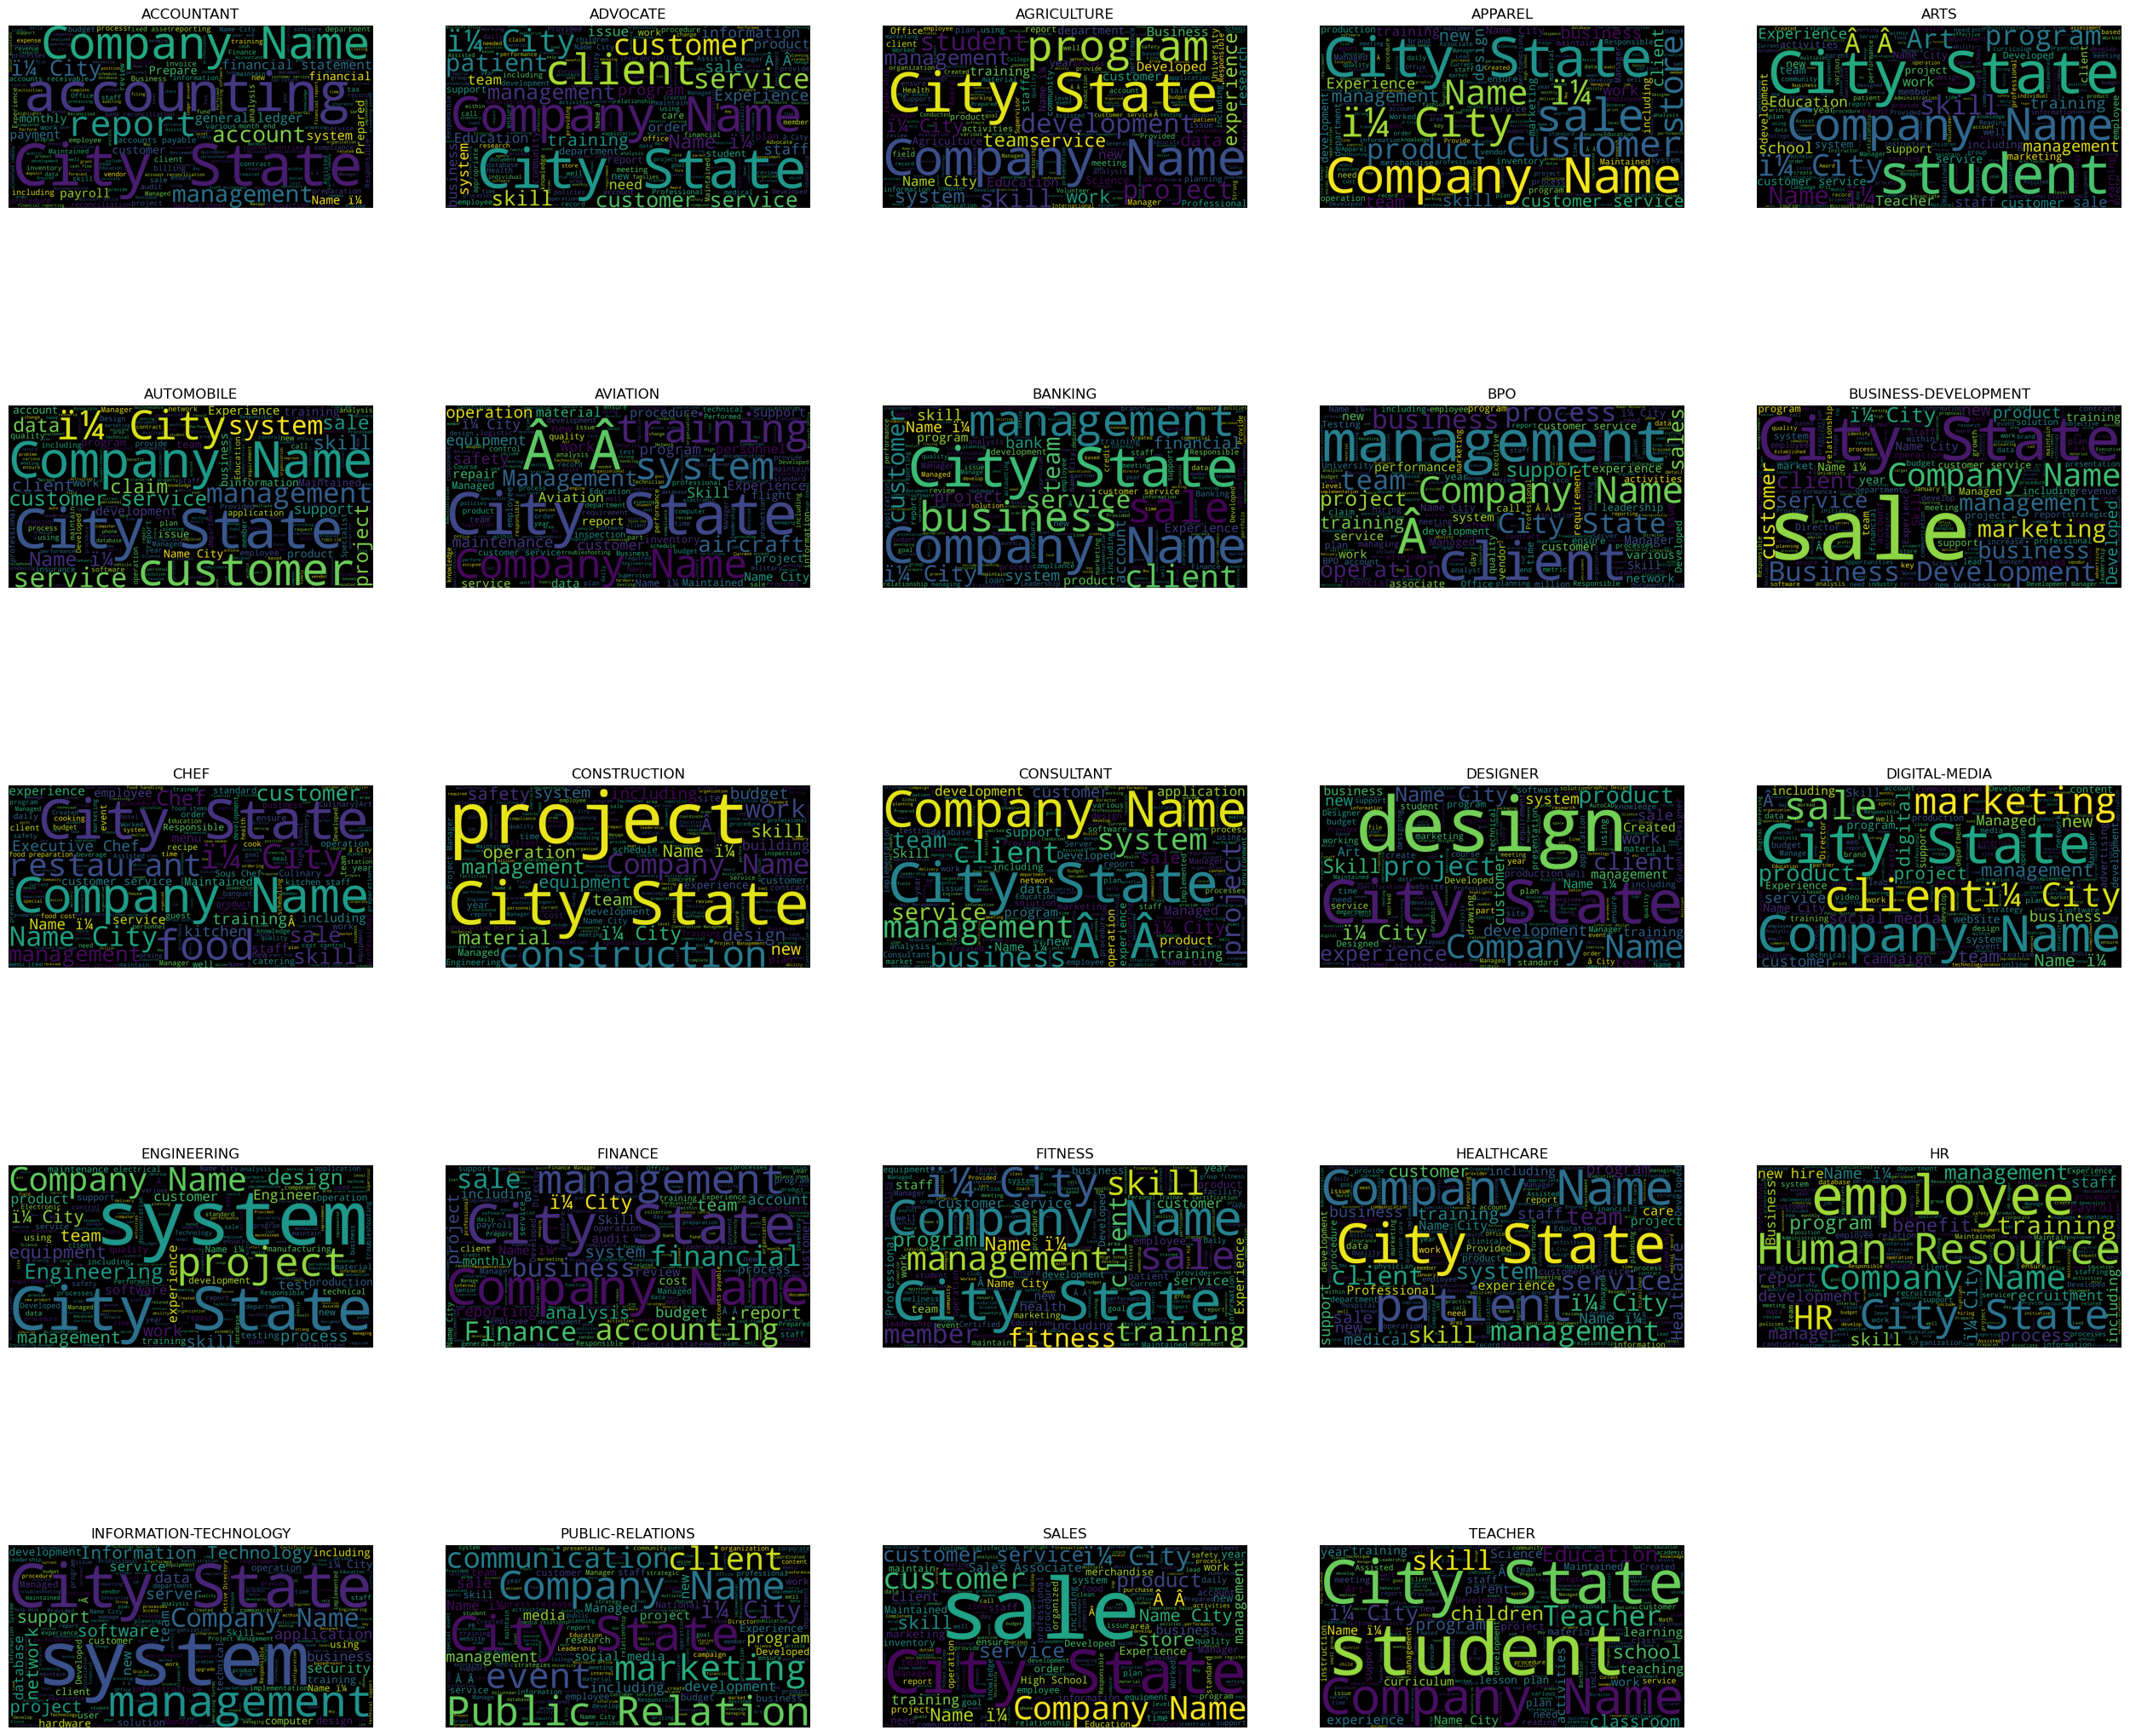

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 28))
for i, category in enumerate(resume_df['category'].unique().tolist()):
    sample_df = resume_df[resume_df['category'] == category]
    wc = wordcloud(sample_df)
    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

In [6]:
resume_initial = pd.read_csv('Resume/Resume.csv')

In [8]:
resume_initial['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [9]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2484 non-null   object
 1   resume_txt  2484 non-null   object
 2   category    2484 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB


In [22]:
def read_files(directory):
    data = []

    # Iterate over all files in the directory
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith(".txt"):
            file_id = os.path.splitext(filename)[0]

            resume_path = os.path.join(directory, f"{file_id}.txt")
            category_path = os.path.join(directory, f"{file_id}.lab")
            with open(resume_path, 'r') as resume_file:
                resume_txt = resume_file.read().strip()

            with open(category_path, 'r') as category_file:
                category = category_file.read().strip()

            data.append({'ID': file_id, 'resume_txt': resume_txt, 'category': category})

    df = pd.DataFrame(data)
    return df
dir = 'Resume_another_corpus'


In [27]:
other_resume_df = read_files(dir)

  0%|          | 0/59566 [00:00<?, ?it/s]

In [28]:
other_resume_df

ID                                         resume_txt  \
0      00001  Database Administrator <span class="hl">Databa...   
1      00002  Database Administrator <span class="hl">Databa...   
2      00003  Oracle Database Administrator Oracle <span cla...   
3      00004  Amazon Redshift Administrator and ETL Develope...   
4      00005  Scrum Master Scrum Master Scrum Master Richmon...   
...      ...                                                ...   
29778  29779  ServiceNow Developer ServiceNow <span class="h...   
29779  29780  Android Developer Android <span class="hl">Dev...   
29780  29781  UI Developer UI <span class="hl">Developer</sp...   
29781  29782  Web Developer <span class="hl">Web</span> <spa...   
29782  29783  Sr. Software Engineer Sr. Software Engineer Sr...   

                                                category  
0                                 Database_Administrator  
1                                 Database_Administrator  
2                                 Database_Administrator  
3                                 Database_Administrator  
4                                 Database_Administrator  
...                                                  ...  
29778  Java_Developer\nWeb_Developer\nSoftware_Developer  
29779                  Web_Developer\nSoftware_Developer  
29780  Software_Developer\nFront_End_Developer\nWeb_D...  
29781                  Web_Developer\nSoftware_Developer  
29782                  Software_Developer\nWeb_Developer  

[29783 rows x 3 columns]

In [29]:
from bs4 import BeautifulSoup
other_resume_df['resume_txt'] = other_resume_df['resume_txt'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [30]:
other_resume_df

ID                                         resume_txt  \
0      00001  Database Administrator Database Administrator ...   
1      00002  Database Administrator Database Administrator ...   
2      00003  Oracle Database Administrator Oracle Database ...   
3      00004  Amazon Redshift Administrator and ETL Develope...   
4      00005  Scrum Master Scrum Master Scrum Master Richmon...   
...      ...                                                ...   
29778  29779  ServiceNow Developer ServiceNow Developer Serv...   
29779  29780  Android Developer Android Developer Android De...   
29780  29781  UI Developer UI Developer UI Developer - Cotiv...   
29781  29782  Web Developer Web Developer Los Angeles, CA Wo...   
29782  29783  Sr. Software Engineer Sr. Software Engineer Sr...   

                                                category  
0                                 Database_Administrator  
1                                 Database_Administrator  
2                                 Database_Administrator  
3                                 Database_Administrator  
4                                 Database_Administrator  
...                                                  ...  
29778  Java_Developer\nWeb_Developer\nSoftware_Developer  
29779                  Web_Developer\nSoftware_Developer  
29780  Software_Developer\nFront_End_Developer\nWeb_D...  
29781                  Web_Developer\nSoftware_Developer  
29782                  Software_Developer\nWeb_Developer  

[29783 rows x 3 columns]

In [31]:
complete_resume_df = pd.concat([resume_df, other_resume_df])

In [32]:
complete_resume_df.to_csv('complete_resume_df.csv', index = False)